In [66]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from plotly.colors import DEFAULT_PLOTLY_COLORS as colors
from scipy.stats import norm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [67]:
def plot_residual_ci(residuals):
    mu, sigma = norm.fit(residuals)
    x = np.linspace(-1, 1, 100)
    fig = go.Figure()
    fig.add_histogram(x=residuals, histnorm='probability density', nbinsx=20, name='Residuals')
    fig.add_trace(go.Scatter(x=x, y=norm.pdf(x, mu, sigma), mode='lines', name='fit'))
    fig.add_trace(go.Scatter(x=[mu - 2 * sigma, mu - 2 * sigma],
                  y=[0, 1], name='95% CI', mode='lines', line=dict(color=colors[2])))
    fig.add_trace(go.Scatter(x=[mu + 2 * sigma, mu + 2 * sigma],
                  y=[0, 1], showlegend=False, mode='lines', line=dict(color=colors[2])))
    fig.add_trace(go.Scatter(x=[mu - 1.25 * sigma, mu - 1.25 * sigma],
                  y=[0, 1], name='80% CI', mode='lines', line=dict(color=colors[3])))
    fig.add_trace(go.Scatter(x=[mu + 1.25 * sigma, mu + 1.25 * sigma],
                  y=[0, 1], showlegend=False, mode='lines', line=dict(color=colors[3])))
    fig.update_layout(height=500, width=750)
    fig.show()
    print(f"95% CI: +/- {2 * sigma:0.2f} log(GE)/ml")
    print(f"80% CI: +/- {1.25 * sigma:0.2f} log(GE)/ml")
    

def get_trendline(df):
    lin_fit_x = df.loc[~(df['Plate count log(cfu)/ml'].isna()),
                          'Plate count log(cfu)/ml']
    lin_fit_y = df.loc[~(df['Plate count log(cfu)/ml'].isna()),
                          'log(Genomic Equivalents)/ml']
    slope, intercept, rval, pval, stderr = linregress(lin_fit_x, lin_fit_y)
    trendline_x=np.linspace(lin_fit_x.min(), lin_fit_x.max())
    trendline_y=slope * np.linspace(lin_fit_x.min(), lin_fit_x.max()) + intercept
    return trendline_x, trendline_y, rval, slope, intercept

In [68]:
counts = pd.read_csv('quantifications.csv')
with open('../../model_training/output_idbd_7logs/model_coefficients_5logs_no_paer.txt') as reg_coeff:
    slope = reg_coeff.readline().split('\t')[1]
    intercept = reg_coeff.readline().split('\t')[1]
reg_data = pd.read_csv('../../model_training/output_idbd_7logs/plot_data.csv', index_col=0)
reg_data_synergy = pd.read_csv('../../model_training/output_synergy/plot_data.csv', index_col=0)

## Possible bins

### GE/ml Distribution

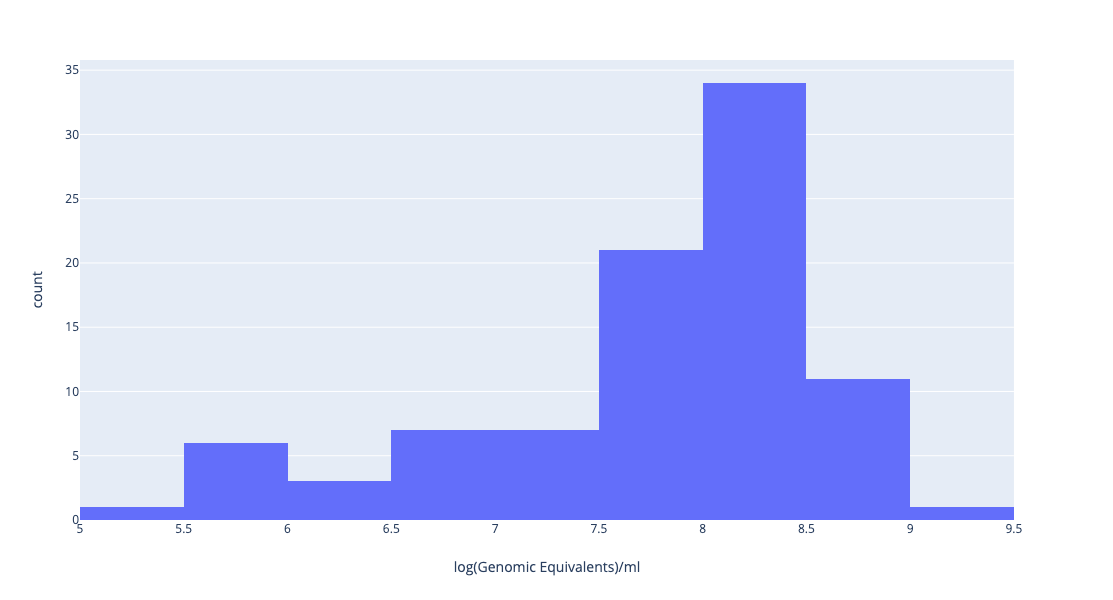

In [69]:
fig_ge_hist = px.histogram(counts, x='log(Genomic Equivalents)/ml')
fig_ge_hist

### Tercile Bins

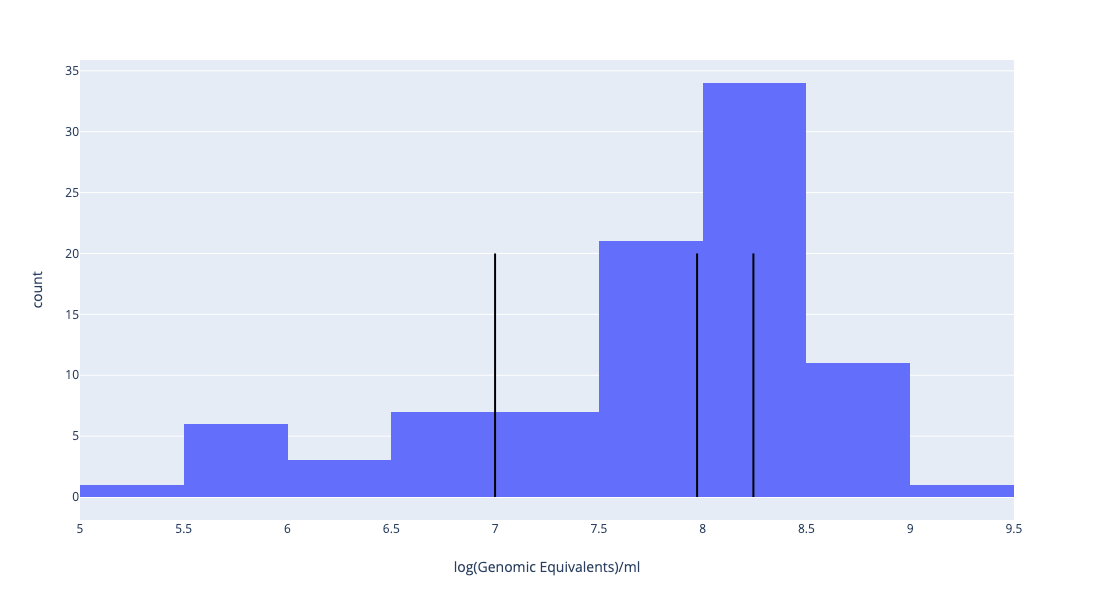

In [70]:
counts_above_7 = counts[(counts['log(Genomic Equivalents)/ml'] > 7) &
                        (~counts['log(Genomic Equivalents)/ml'].isna())]
lower_tercile = np.quantile(counts_above_7['log(Genomic Equivalents)/ml'], 0.33)
upper_tercile = np.quantile(counts_above_7['log(Genomic Equivalents)/ml'], 0.66)
fig_tercile = go.Figure(fig_ge_hist)
fig_tercile.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_tercile.add_trace(go.Scatter(x=[lower_tercile, lower_tercile],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_tercile.add_trace(go.Scatter(x=[upper_tercile, upper_tercile],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_tercile.show()

### Equal bins

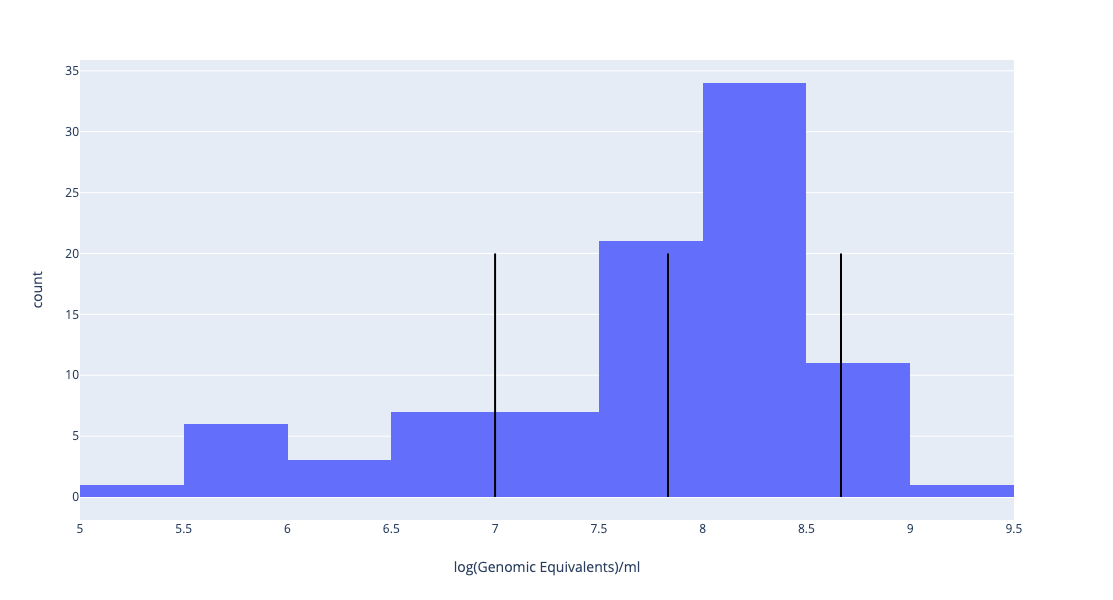

In [71]:
fig_thirds = go.Figure(fig_ge_hist)
fig_thirds.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_thirds.add_trace(go.Scatter(x=[7.833, 7.833],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_thirds.add_trace(go.Scatter(x=[8.66666, 8.6666],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_thirds.show()

### Two bins above 10<sup>7</sup>

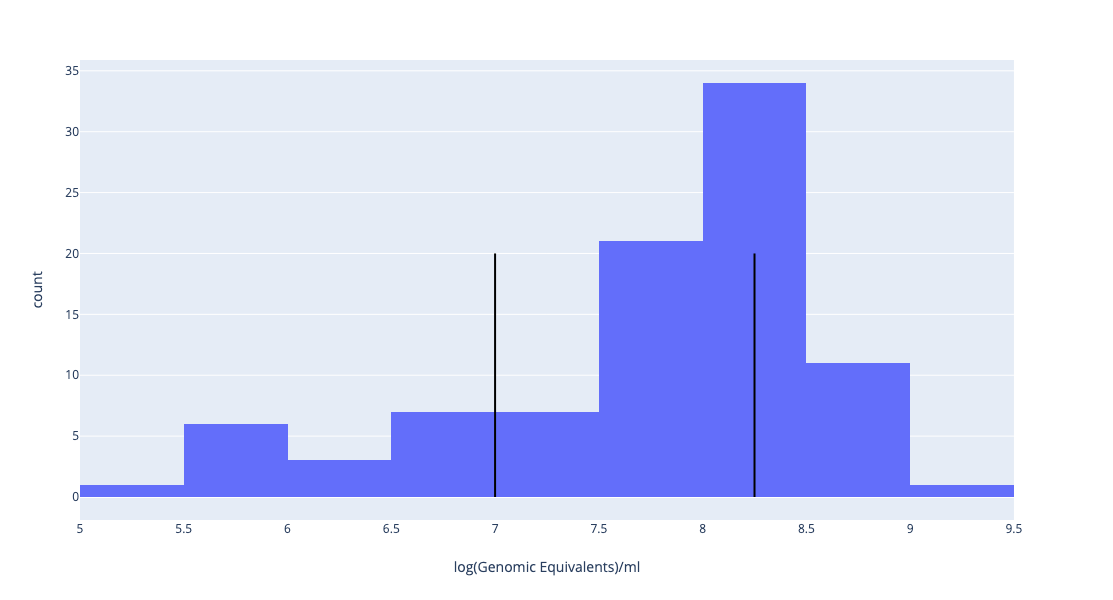

In [72]:
fig_two = go.Figure(fig_ge_hist)
fig_two.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_two.add_trace(go.Scatter(x=[8.25, 8.25],
                                 y=[0, 20], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_two.show()

## Residuals

### IDBD standard curve

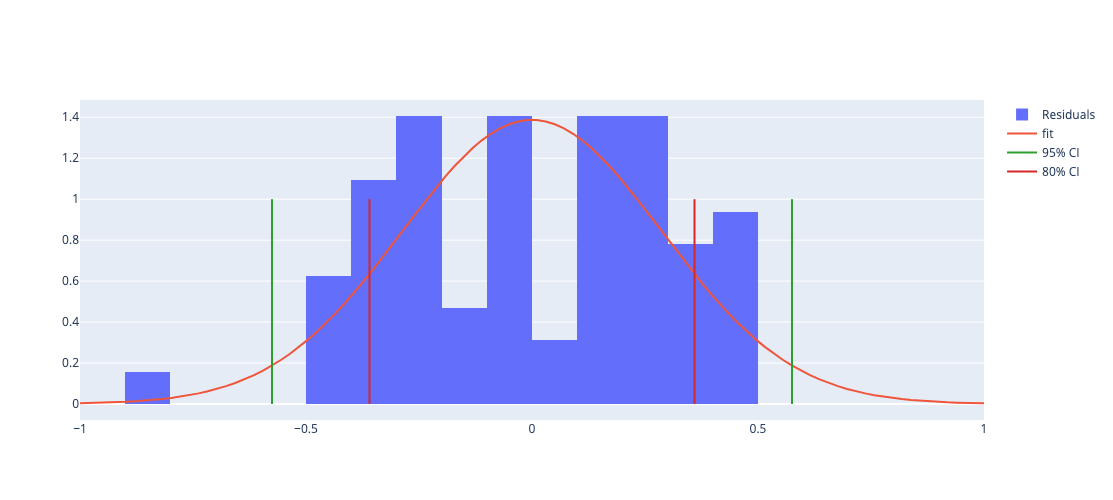

95% CI: +/- 0.58 log(GE)/ml
80% CI: +/- 0.36 log(GE)/ml


In [73]:
plot_residual_ci(reg_data['residuals'])

### Synergy standard curve

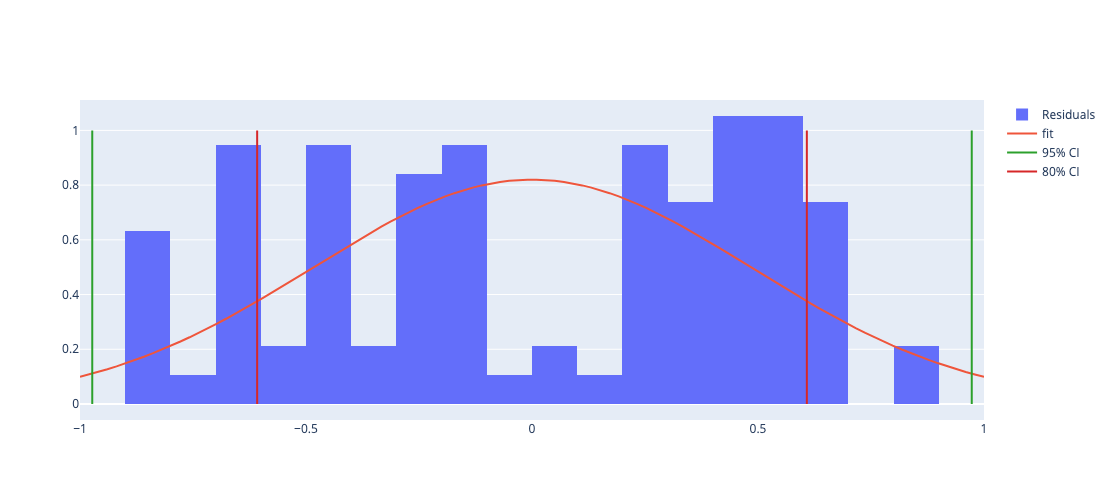

95% CI: +/- 0.97 log(GE)/ml
80% CI: +/- 0.61 log(GE)/ml


In [74]:
plot_residual_ci(reg_data_synergy['residuals'])

## Binning confidence

### Three bins above 10<sup>7</sup>, Synergy error

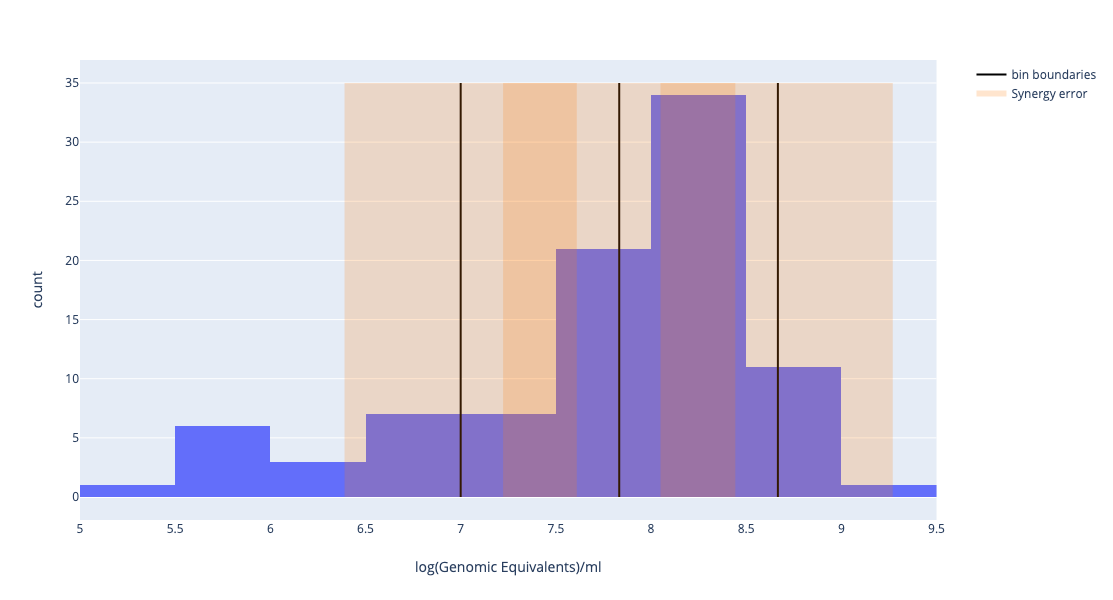

In [75]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7.833, 7.833],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.66666, 8.6666],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.61, 7+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[7.833-0.61, 7.833+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.add_trace(go.Scatter(x=[8.66-0.61, 8.66+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))

### Three bins above 10<sup>7</sup>, IDBD error

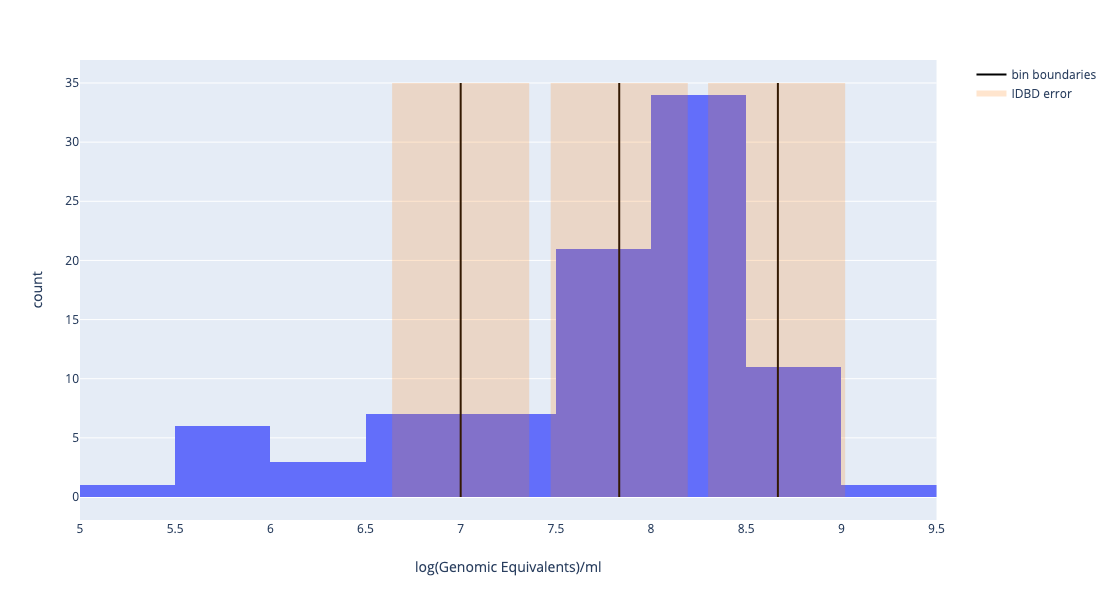

In [76]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7.833, 7.833],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.66666, 8.6666],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.36, 7+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               name='IDBD error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[7.833-0.36, 7.833+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.add_trace(go.Scatter(x=[8.66-0.36, 8.66+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))

### Two bins above 10<sup>7</sup>, Synergy error

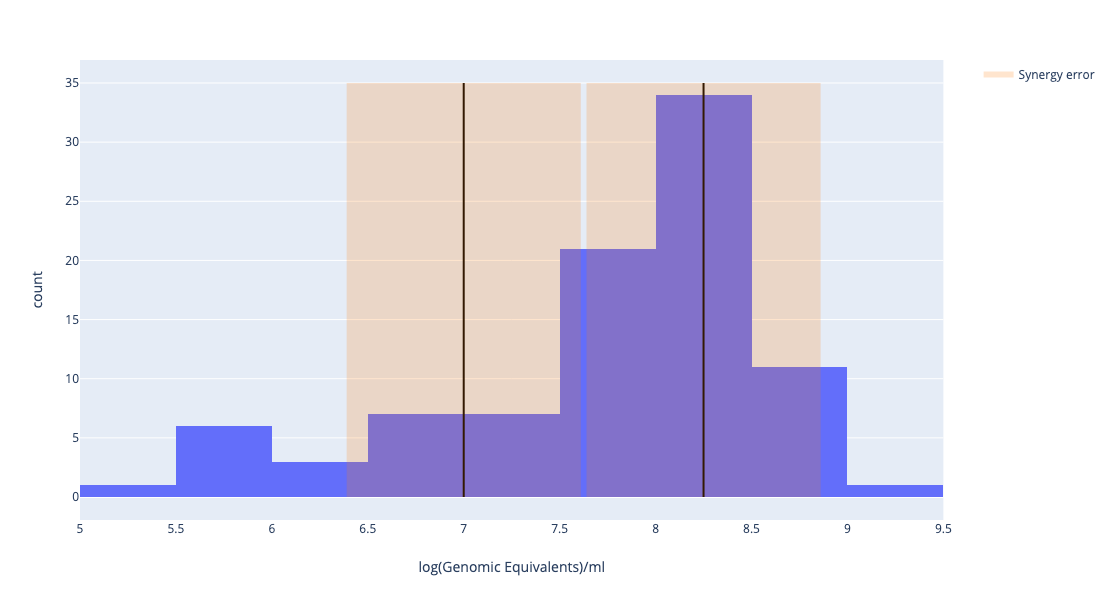

In [77]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.25, 8.25],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.61, 7+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[8.25-0.61, 8.25+0.61], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.show()

### Two bins above 10<sup>7</sup>, IDBD error

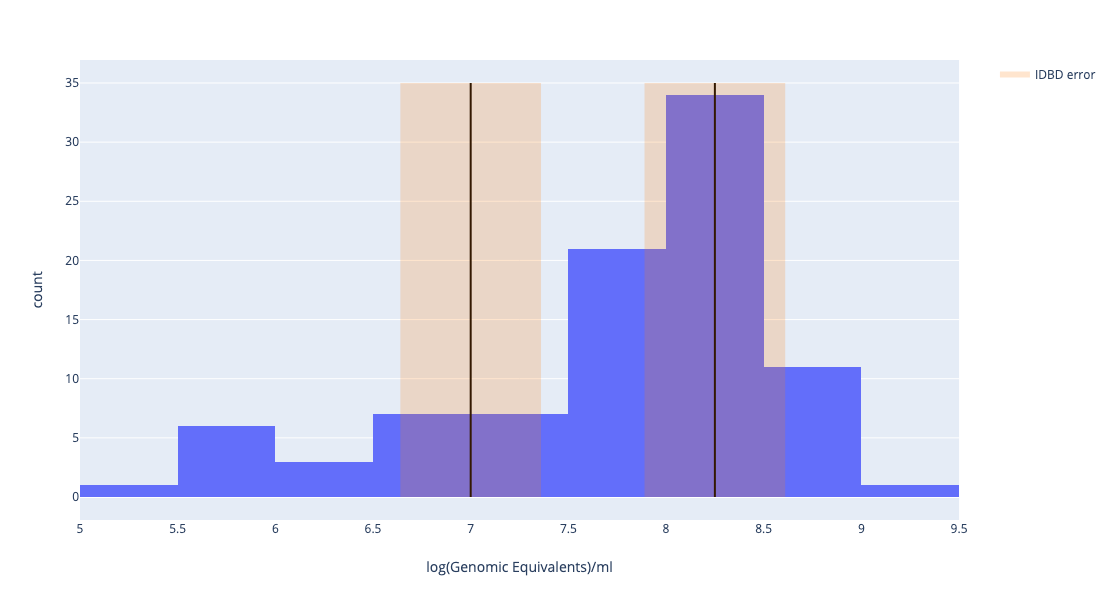

In [78]:
fig_error = go.Figure(fig_ge_hist)
fig_error.add_trace(go.Scatter(x=[7, 7],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[8.25, 8.25],
                                 y=[0, 35], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_error.add_trace(go.Scatter(x=[7-0.36, 7+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               name='IDBD error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_error.add_trace(go.Scatter(x=[8.25-0.36, 8.25+0.36], y=[35, 35], fill='tozeroy', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_error.show()

## Correlation plots 

### Synergy

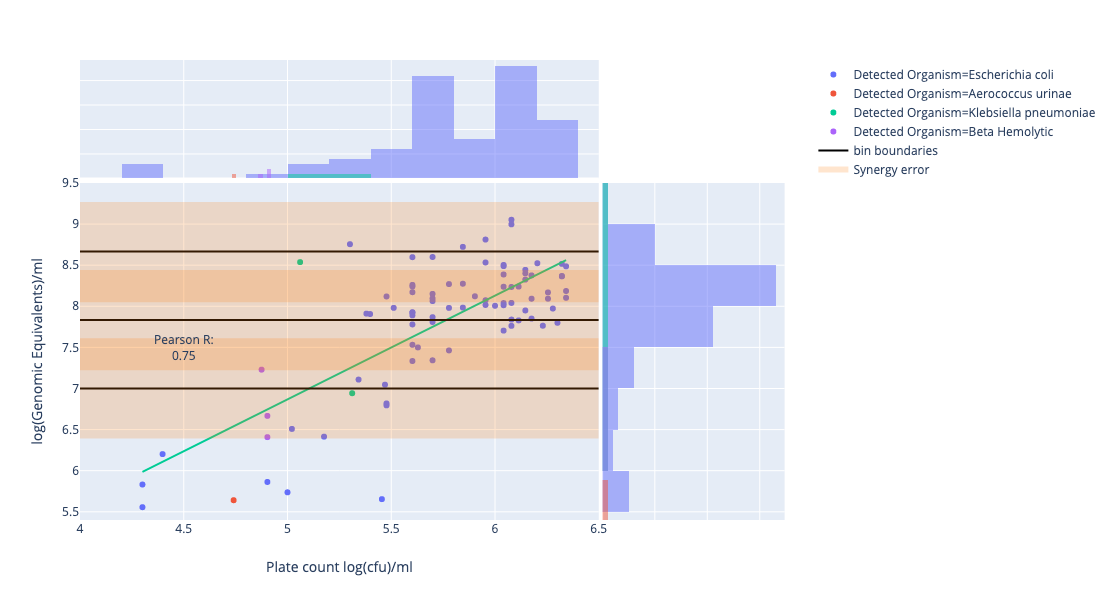

In [79]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=trendline_x, y=trendline_y,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
fig_cor.add_trace(go.Scatter(y=[7, 7],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7.833, 7.833],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[8.66666, 8.6666],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7-0.61, 7+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[7.833-0.61, 7.833+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.add_trace(go.Scatter(y=[8.66-0.61, 8.66+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5.4, 9.5]))
fig_cor.show()

Correlation fit
slope: 1.2623530018896445
intercept: 0.554962394032656


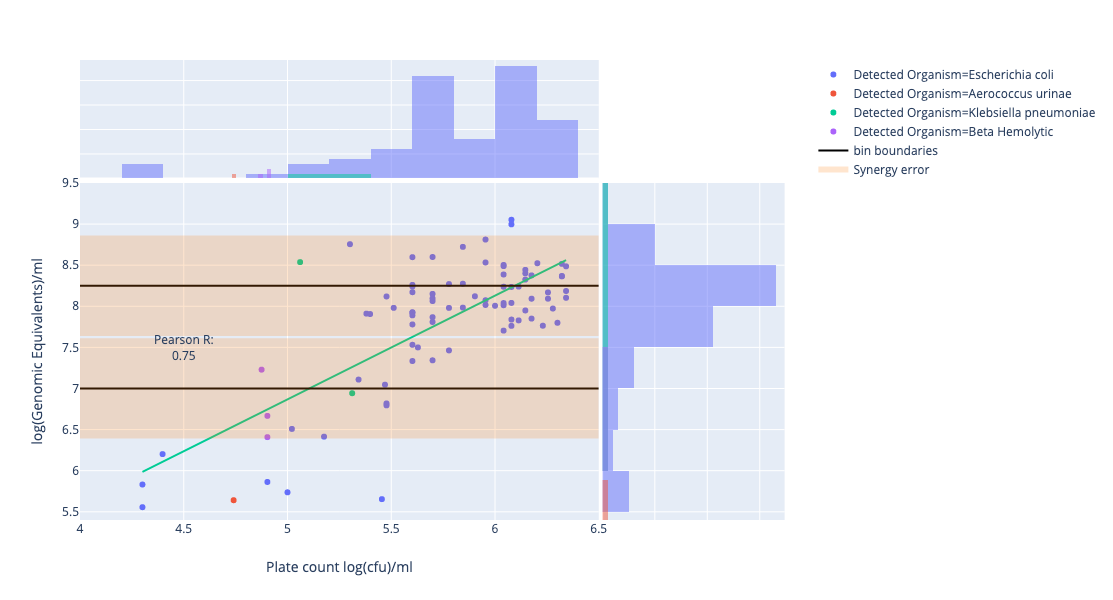

In [80]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
print(f"Correlation fit\nslope: {slope}\nintercept: {intercept}")
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=trendline_x, y=trendline_y,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
fig_cor.add_trace(go.Scatter(y=[7, 7],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[8.25, 8.25],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7-0.61, 7+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[8.25-0.61, 8.25+0.61], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5.4, 9.5]))
fig_cor.show()

### IDBD

Correlation fit
slope: 1.2623530018896445
intercept: 0.554962394032656


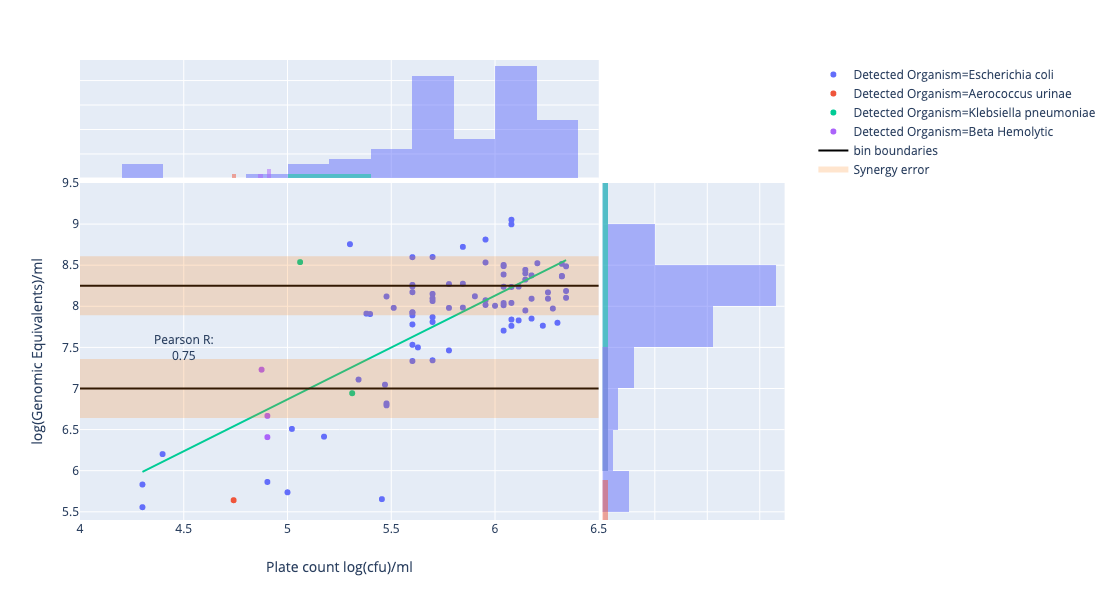

In [81]:
ge_df = counts[~counts['log(Genomic Equivalents)/ml'].isna()]
trendline_x, trendline_y, rval, slope, intercept = get_trendline(ge_df)
print(f"Correlation fit\nslope: {slope}\nintercept: {intercept}")
fig_cor = px.scatter(ge_df[~(ge_df['Plate count log(cfu)/ml'].isna())],
                     x='Plate count log(cfu)/ml',
                     y='log(Genomic Equivalents)/ml',
                     marginal_x='histogram', marginal_y='histogram',
                     color='Detected Organism',
                     hover_data=['Accession',
                                 'Detected Organism',
                                 'Plate count log(cfu)/ml',
                                 'log(Genomic Equivalents)/ml'])
fig_cor.add_scatter(x=trendline_x, y=trendline_y,
                    mode='lines', showlegend=False)
fig_cor.update_layout(
    annotations=[
        dict(x=4.5, y=7.5, text=f"Pearson R:<br>{rval:0.2f}", showarrow=False)
    ]
)
fig_cor.add_trace(go.Scatter(y=[7, 7],
                                 x=[4, 6.5], mode='lines', name='bin boundaries',
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[8.25, 8.25],
                                 x=[4, 6.5], mode='lines', showlegend=False,
                                 line=dict(color='rgb(0,0,0)')))
fig_cor.add_trace(go.Scatter(y=[7-0.36, 7+0.36], x=[6.5, 6.5], fill='tozerox', mode='none',
                               name='Synergy error', fillcolor='rgba' + colors[1][3:-1] + ', 0.2)'))
fig_cor.add_trace(go.Scatter(y=[8.25-0.36, 8.25+0.36], x=[6.5, 6.5], fill='tozerox', mode='none',
                               fillcolor='rgba' + colors[1][3:-1] + ', 0.2)', showlegend=False))
fig_cor.update_layout(xaxis=dict(range=[4, 6.5]), yaxis=dict(range=[5.4, 9.5]))
fig_cor.show()